


# Lab Course Machine Learning
# Exercise Sheet 10
January 23th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 1: Exploring Movie Recommendation Dataset

In [545]:
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from scipy.spatial.distance import pdist,cdist
warnings.filterwarnings('ignore')
from itertools import combinations
import operator
from sklearn.decomposition import NMF

In [151]:
ratingdf = pd.read_csv('ml-100k/u.data', sep = '\t',names = ['user_id','item_id' , 'rating' , 'timestamp'],header = None)
ratingdf.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [152]:
itemdf = pd.read_csv('ml-100k/u.item', sep = '|',header = None,encoding='latin',names = [ 'movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western'])
itemdf.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [153]:
userdf = pd.read_csv('ml-100k/u.user', sep = '|',header = None,encoding='latin',names = ['user_id' ,'age' , 'gender' , 'occupation' , 'zip_code'])
userdf.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [154]:
ratingdf['user_id'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [155]:
ratingdf.query('user_id == 1')

,user_id,item_id,rating,timestamp
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


Text(0.5, 1.0, 'User Rating')

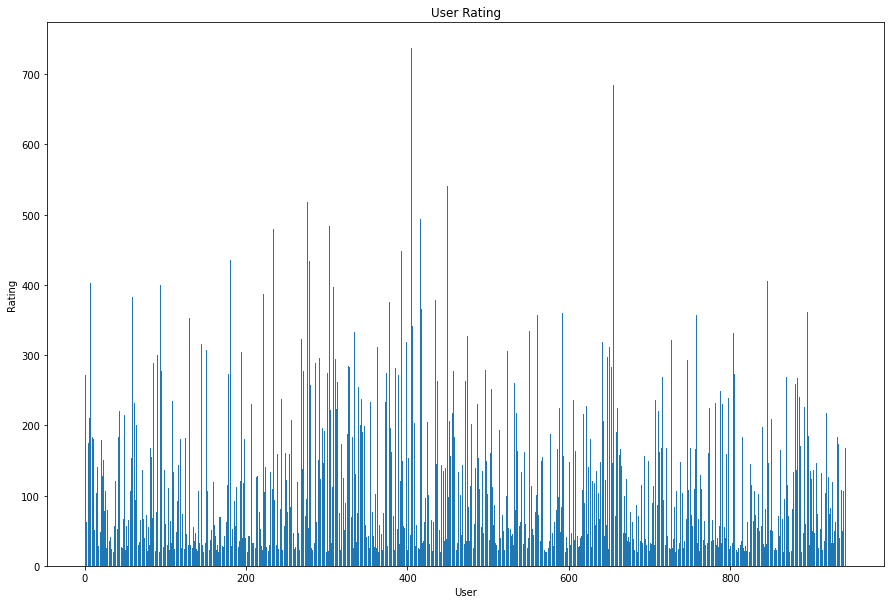

In [619]:
cd = ratingdf['user_id'].value_counts()
cd = cd.sort_index()
plt.figure(figsize=(15, 10))
plt.bar(cd.index,cd.values)
plt.xlabel('User')
plt.ylabel('Rating')
plt.title('User Rating')

Text(0.5, 1.0, 'Item Rating')

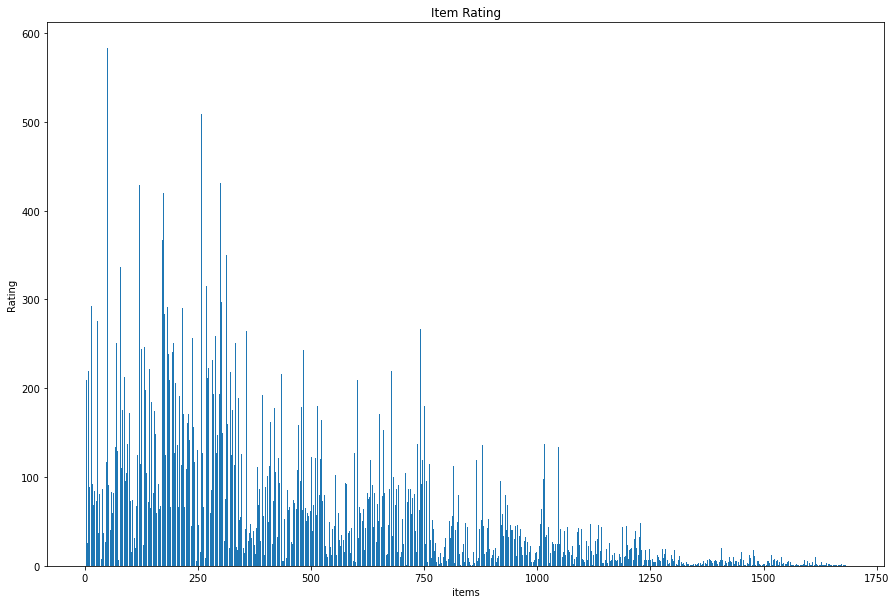

In [620]:
cd = ratingdf['item_id'].value_counts()
cd = cd.sort_index()
plt.figure(figsize=(15, 10))
plt.bar(cd.index,cd.values)
plt.xlabel('items')
plt.ylabel('Rating')
plt.title('Item Rating')

In [158]:
mergeDf = pd.merge(ratingdf, itemdf, right_on='movie_id',left_on= 'item_id', how='inner')
mergeDf

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,1674,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,1640,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,1637,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,1630,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
genreList = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western']
rating = []
for g in genreList:
    rating.append(len(mergeDf.query(g+'==1 & rating > 3')))

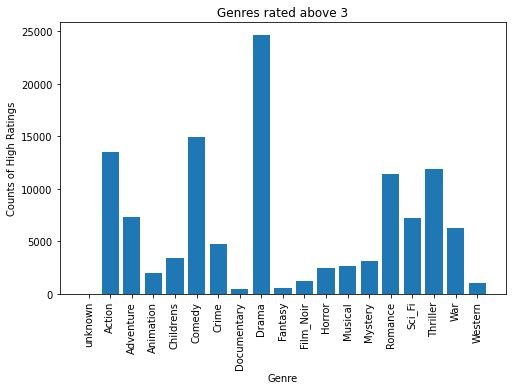

In [160]:
plt.figure(figsize=(8, 5))
plt.bar(genreList,rating)
plt.xticks(genreList,  rotation='vertical')
plt.title('Genres rated above 3')
plt.xlabel('Genre')
plt.ylabel('Counts of High Ratings')
plt.show()

In [161]:
mergeUserDf = pd.merge(mergeDf, userdf, on= 'user_id', how='inner')
mergeUserDf

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Mystery,Romance,Sci_Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,313,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,891392656,326,G.I. Jane (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?G%2EI%2E+Jane...,0,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,891392577,348,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,891392698,358,Spawn (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Spawn+(1997/I),0,...,0,0,1,1,0,0,48,F,administrator,33763


In [188]:
groupRating ={}
ageGroups =['0-9','10-19','20-29','30-39','40-49','50-100']
ageGroupsGenre = {}
for a in ageGroups :
    
    for g in genreList:
        queryStr =g+'==1 & rating >3 and age>='+a.split('-')[0]+' & age<='+a.split('-')[1]+''
        groupRating.update({g:len(mergeUserDf.query(queryStr))})
    bestGenre = max(groupRating.items(), key=operator.itemgetter(1))[0]
    ageGroupsGenre.update({a:bestGenre})
ageGroupsGenre

{'0-9': 'Comedy',
 '10-19': 'Drama',
 '20-29': 'Drama',
 '30-39': 'Drama',
 '40-49': 'Drama',
 '50-100': 'Drama'}

In [184]:
groupRating

{'unknown': 0,
 'Action': 500,
 'Adventure': 270,
 'Animation': 54,
 'Childrens': 100,
 'Comedy': 560,
 'Crime': 241,
 'Documentary': 23,
 'Drama': 1315,
 'Fantasy': 23,
 'Film_Noir': 104,
 'Horror': 80,
 'Musical': 108,
 'Mystery': 212,
 'Romance': 507,
 'Sci_Fi': 261,
 'Thriller': 492,
 'War': 430,
 'Western': 69}

## Exercise 2: Implementing basic matrix factorization (MF) technique for recommender systems

In [240]:
userIds = userdf['user_id'].unique()
len(userIds)


943

In [241]:
itemIds = itemdf['movie_id'].unique()
len(itemIds)

1682

In [242]:
ratingMatrix = np.zeros(shape=(len(userIds),len(itemIds)))
for u in userIds:
    for i in itemIds:
        rating = ratingdf[(ratingdf.user_id == u) & (ratingdf.item_id == i)]['rating']
        if(len(rating)>0):
            ratingMatrix[u-1][i-1] = rating.values[0]
        
    

        
    


In [481]:
ratingMatrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [427]:
rtest = np.array([[10,2,3],[3,4,5]])

In [490]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [525]:
ratingM = NormalizeData(ratingMatrix)
ratingM

array([[1. , 0.6, 0.8, ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [526]:
rtrain = ratingM[0:math.floor(len(ratingM)*0.7)]
rValidation = ratingM[math.floor(len(ratingM)*0.70):math.floor(len(ratingM)*0.85)]
rtest = ratingM[math.floor(len(ratingM)*0.85):]
len(rtrain)+len(rValidation)+len(nds_test) == len(ratingM)

True

In [569]:
def learnLatentFactors(R ,lamda,alpha,K,epox):
    r,c = R.shape
    mu, sigma = 1, 0.1 # mean and standard deviation
    P = np.random.normal(mu, sigma, size=(r, K))
    Q = np.random.normal(mu, sigma, size=(K, c))
    rmseList = []
    for e in range (epox):
        E = 0
        for i in range(r):
            for j in range(c):
                if(R[i, j] > 0):
                    E = R[i, j] - np.dot(P[i,:],Q[:,j])
                    for k in range (K):
                        P[i,k] = P[i,k] + alpha*((E*Q[k,j])-(lamda*P[i,k]))
                        Q[k,j] = Q[k,j] + alpha*((E*P[i,k])-(lamda*Q[k,j]))
        r_hat= np.dot(P, Q)
        rmseList.append(np.sqrt(np.square(np.subtract(R,r_hat))).mean(axis=None))
    return P,Q,rmseList
    

In [579]:
%%time
pMat,qMat,rmseListTrain = learnLatentFactors(rtrain,0.8,0.01,3,500)

Wall time: 8min 25s


In [580]:
pMat

array([[1.37515921e-04, 1.34522469e-04, 1.33280173e-04],
       [1.34749843e-04, 1.31389384e-04, 1.30443082e-04],
       [9.83111080e-05, 9.45392707e-05, 9.41540685e-05],
       ...,
       [1.35906108e-04, 1.33159156e-04, 1.31827060e-04],
       [1.31230337e-04, 1.28675852e-04, 1.27449493e-04],
       [7.69157552e-05, 7.51177194e-05, 7.45757787e-05]])

In [581]:
qMat

array([[1.36832161e-04, 1.57957557e-04, 1.06620972e-04, ...,
        8.88654194e-01, 1.13115016e+00, 1.01827904e+00],
       [1.33963209e-04, 1.54567849e-04, 1.02635619e-04, ...,
        9.93368037e-01, 1.01672895e+00, 8.94825312e-01],
       [1.32196019e-04, 1.52574646e-04, 1.02723414e-04, ...,
        8.89010904e-01, 9.77236385e-01, 9.24175566e-01]])

In [582]:
r_new = np.dot(pMat, qMat)

In [583]:
r_new

array([[5.44567706e-08, 6.28497028e-08, 4.21598725e-08, ...,
        3.74321948e-04, 4.22570279e-04, 3.83577969e-04],
       [5.32835118e-08, 6.14956374e-08, 4.12519487e-08, ...,
        3.66229349e-04, 4.13483422e-04, 3.75335796e-04],
       [3.85636985e-08, 4.45072378e-08, 2.98569499e-08, ...,
        2.64980862e-04, 2.99336221e-04, 2.71719162e-04],
       ...,
       [5.38617668e-08, 6.21629880e-08, 4.16990394e-08, ...,
        3.70245275e-04, 4.17943184e-04, 3.79375871e-04],
       [5.20426763e-08, 6.00635344e-08, 4.02906789e-08, ...,
        3.57744857e-04, 4.03817962e-04, 3.66557218e-04],
       [3.04461808e-08, 3.51385821e-08, 2.35712648e-08, ...,
        2.09269730e-04, 2.36255793e-04, 2.14460050e-04]])

In [584]:
def kFoldCrossValitaion(R,lamda,alpha,K,split):
    chunkSize = int(np.floor(len(R)/split))
    meanAcc =0
    accLogList = []

    for i in range (split):
        pMat,qMat,rmseLists = learnLatentFactors(R,lamda,alpha,K,10)
        index = list(range(i*chunkSize,(i*chunkSize)+chunkSize))
        
        # for test data
        pMat_test = np.delete(pMat,index,0)
        r_test = np.delete(R,index,0)
    
        r_hat_test = np.dot(pMat_test, qMat)
        rmse = np.sqrt(np.square(np.subtract(r_test,r_hat_test))).mean(axis=None)
        meanAcc += rmse
        
    return (meanAcc/split)

In [585]:
%%time
aplha =[0.005,0.008,0.015]
lamda = [0.4,0.7,0.9]
k_dimension = [3,4,5]
grid =list(itertools.product(itertools.product(aplha, lamda),k_dimension))

meanList =[]
for (alpha,lamda),K_d in grid:
    
    meanError = kFoldCrossValitaion(rtrain,lamda,alpha,K_d,5)
    
    meanList.append(list([meanError,µ,lamda,K_d]))

Wall time: 25min 53s


In [586]:
minRmse,bestLamda,bestAlpha,bestK = min(meanList)
print("The best parameters are: Lamda = %f,alpha = %f,latent Dimension K = %i " % (bestLamda,bestAlpha,bestK))

The best parameters are: Lamda = 0.001000,alpha = 0.900000,latent Dimension K = 3 


## For Train RMSE

In [613]:
%%time
pMat,qMat,rmseListTrain = learnLatentFactors(rtrain,bestLamda,bestAlpha,bestK,100)
r_hat = np.dot(pMat, qMat)
rmse = np.sqrt(np.square(np.subtract(rtrain,r_hat))).mean(axis=None)
print('Validation Set RMSE:',rmse)

Validation Set RMSE: 0.9631918924427567
Wall time: 2min 6s


## For Validation RMSE

In [614]:
%%time
pMat,qMat,rmseListVal = learnLatentFactors(rValidation,bestLamda,bestAlpha,bestK,100)
r_hat = np.dot(pMat, qMat)
rmse = np.sqrt(np.square(np.subtract(rValidation,r_hat))).mean(axis=None)
print('Validation Set RMSE:',rmse)

Validation Set RMSE: 0.7683997374142078
Wall time: 24.7 s


## For Test RMSE

In [615]:
%%time
pMat,qMat,rmseListTest = learnLatentFactors(rtest,bestLamda,bestAlpha,bestK,100)
r_hat = np.dot(pMat, qMat)
rmse = np.sqrt(np.square(np.subtract(rtest,r_hat))).mean(axis=None)
print('Test Set RMSE:',rmse)

Test Set RMSE: 0.7671975685484357
Wall time: 27.1 s


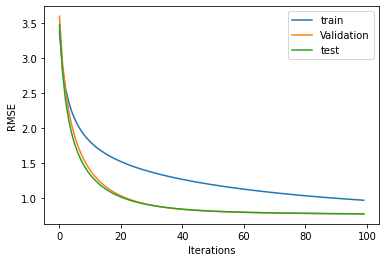

Wall time: 96.9 ms


In [618]:
%%time
fig = plt.rmseListTrainize=(14,10)
ax = plt.axes()

ax.plot(rmseListTrain[:100],label='train')
ax.plot(rmseListVal,label='Validation')
ax.plot(rmseListTest,label='test')
ax.set_xlabel('Iterations')
ax.set_ylabel('RMSE')
ax.legend()
plt.show()




## Exercise 3: Recommender Systems using matrix factorization sckitlearn

In [590]:
def kFoldCrossValitaionSklearn(R,lamda,alpha,K,split):
    chunkSize = int(np.floor(len(R)/split))
    meanAcc =0
    accLogList = []

    for i in range (split):
        model = NMF(n_components=K, init='random', alpha=alpha,l1_ratio=lamda,random_state=0,solver='cd')
        pMat = model.fit_transform(R);
        qMat = model.components_;

        index = list(range(i*chunkSize,(i*chunkSize)+chunkSize))
        
        # for test data
        pMat_test = np.delete(pMat,index,0)
        r_test = np.delete(R,index,0)
    
        r_hat_test = np.dot(pMat_test, qMat)
        rmse = np.sqrt(np.square(np.subtract(r_test,r_hat_test))).mean(axis=None)
        meanAcc += rmse
        
    return (meanAcc/split)

In [591]:
%%time
aplha =[10**(-6),10**(-7),10**(-8)]
lamda = [10**(-3),10**(-4),10**(-5)]
k_dimension = [3,4,5]
grid =list(itertools.product(itertools.product(aplha, lamda),k_dimension))

meanList =[]
for (alpha,lamda),K_d in grid:
    
    meanError = kFoldCrossValitaionSklearn(rtrain,lamda,alpha,K_d,5)
    
    meanList.append(list([meanError,µ,lamda,K_d]))

Wall time: 14.5 s


In [592]:
minRmse,bestLamda,bestAlpha,bestK = min(meanList)
print("The best parameters are: Lamda = %f,alpha = %f,latent Dimension K = %i " % (bestLamda,bestAlpha,bestK))

The best parameters are: Lamda = 0.001000,alpha = 0.001000,latent Dimension K = 5 


## For Validation RMSE

In [593]:
model = NMF(n_components=bestK, init='random', alpha=bestAlpha,l1_ratio=bestLamda,random_state=0,solver='cd')
pMat = model.fit_transform(rValidation);
qMat = model.components_;
r_hat = np.dot(pMat, qMat)
rmse = np.sqrt(np.square(np.subtract(rValidation,r_hat))).mean(axis=None)
print('Validation Set RMSE:',rmse)

Validation Set RMSE: 0.04762047130965496


## For Test RMSE

In [594]:
model = NMF(n_components=bestK, init='random', alpha=bestAlpha,l1_ratio=bestLamda,random_state=0,solver='cd')
pMat = model.fit_transform(rtest);
qMat = model.components_;
r_hat = np.dot(pMat, qMat)
rmse = np.sqrt(np.square(np.subtract(rtest,r_hat))).mean(axis=None)
print('Test Set RMSE:',rmse)

Test Set RMSE: 0.05559738401334793


As seen with scikit-learn, rmse is better on all the dataset than on my implemention. So it is useful to use scikit learn library.